In [1]:
import numpy as np
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
import os
import os.path as osp

In [3]:
def get_categorical(y):
    s = set()
    for v in y:
        s.add(v)
    
    s = list(s)
    name_to_class = dict(zip( s, range(len(s)) ))
    
    y_ = np.ndarray(shape=len(y), dtype='int')
    
    for i in range(y_.shape[0]):
        y_[i] = name_to_class[y[i]]
    
    return y_

def get_class_labels(y):
    return get_categorical(y) % 2

def threshold(y):
    t = np.percentile(y, q=50)
    return np.where(y > t, 1, 0).astype('int')

In [4]:
d1 = pd.read_csv('./datasets/real_1.csv', header=None)

In [5]:
X1 = d1[[0, 1, 2, 3]].get_values()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

y1 = get_class_labels(d1[4].get_values())

In [6]:
d2 = pd.read_csv('./datasets/real_2.csv', header=None)

In [7]:
d = d2
X2 = d[:-1].get_values()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

n = len(d.columns) - 1
y2 = get_class_labels(d[n].get_values())

In [8]:
d3 = pd.read_csv('./datasets/real_3.csv')
d3['month'] = get_categorical(d3['month'].get_values())
d3['day'] = get_categorical(d3['day'].get_values())

In [9]:
d = d3
X3 = d[d.columns[:-1]].get_values()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

n = len(d.columns) - 1
y3 = threshold(d[d.columns[-1]].get_values())

In [10]:
d4 = pd.read_csv('./datasets/real_4.csv', header=None)

In [11]:
d = d4

X4 = d[d.columns[2:]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X4 = scaler.fit_transform(X4)

y4 = get_class_labels(d[1].get_values())

In [12]:
print(
    X1.shape,
    X2.shape,
    X3.shape,
    X4.shape
)

(150, 4) (177, 14) (517, 12) (569, 30)


In [13]:
def process(x, y, m=30, k = 150):
    n = m - x.shape[1]
    
    indx = np.random.permutation(x.shape[0])
    x = x[indx[:k], :]
    y = y[indx[:k]]
    
    print(y.shape)
    
    return np.hstack([x, np.random.uniform(-1, 1, size=(k, n)), y.reshape((k, 1))])

In [14]:
X1 = process(X1, y1)
X2 = process(X2, y2)
X3 = process(X3, y3)
X4 = process(X4, y4)

(150,)
(150,)
(150,)
(150,)


In [15]:
print(
    X1.shape,
    X2.shape,
    X3.shape,
    X4.shape
)

(150, 31) (150, 31) (150, 31) (150, 31)


In [16]:
np.savetxt('datasets/real_1.txt', X1)
np.savetxt('datasets/real_2.txt', X1)
np.savetxt('datasets/real_3.txt', X1)
np.savetxt('datasets/real_4.txt', X1)

In [17]:
def mandelbrot(c1, c2, n = 1024):
    x = 0
    y = 0
    
    for i in range(1024):
        if x ** 2 + y ** 2 > 4:
            return 0
        x = x * x - y * y + c1
        y = 2 * x * y + c2

    if x ** 2 + y ** 2 > 4:
        return 0
    else:
        return 1

In [18]:
xs = np.random.uniform(-1, 1, size=(150, 2))
ys = np.array([ mandelbrot(xs[i, 0], xs[i, 1]) for i in range(xs.shape[0]) ])

x1 = process(xs, ys)

np.savetxt('mandelbrot_1.txt', x1)

(150,)


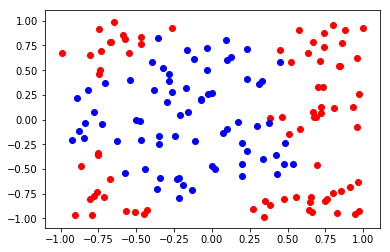

In [19]:
plt.scatter(xs[ys == 0, 0], xs[ys == 0, 1], color='red')
plt.scatter(xs[ys == 1, 0], xs[ys == 1, 1], color='blue')

In [20]:
def gen_hard(eps = 0.1, f = mandelbrot):
    xs = []
    ys = []

    while len(xs) < 150:
        c1, c2 = np.random.uniform(-1, 1, size=2)
        e1, e2 = np.random.uniform(-1, 1, size=2) * eps

        m1 = f(c1, c2)
        m2 = f(c1 + e1, c2 + e2)

        if m1 != m2:
            xs.append([c1, c2])
            ys.append(m1)
    return np.array(xs), np.array(ys)

In [21]:
xs, ys = gen_hard(eps=0.2)
x2 = process(xs, ys)
np.savetxt('mandelbrot_2.txt', x2)

(150,)


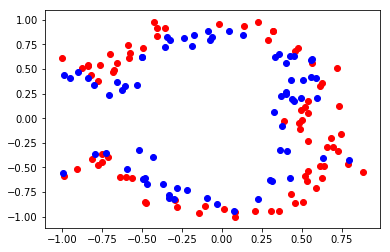

In [22]:
plt.scatter(xs[ys == 0, 0], xs[ys == 0, 1], color='red')
plt.scatter(xs[ys == 1, 0], xs[ys == 1, 1], color='blue')

In [23]:
xs, ys = gen_hard(eps=0.01)
x3 = process(xs, ys)
np.savetxt('mandelbrot_3.txt', x3)

(150,)


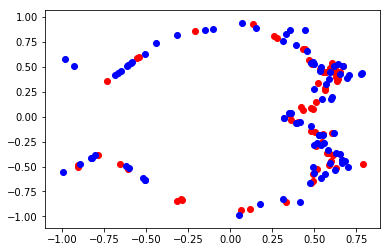

In [24]:
plt.scatter(xs[ys == 0, 0], xs[ys == 0, 1], color='red')
plt.scatter(xs[ys == 1, 0], xs[ys == 1, 1], color='blue')

In [25]:
def julia(x, y, c1=-0.835, c2=-0.2321, n =1024):
    for i in range(1024):
        if x ** 2 + y ** 2 > 4:
            return 0
        x = x * x - y * y + c1
        y = 2 * x * y + c2

    if x ** 2 + y ** 2 > 4:
        return 0
    else:
        return 1

In [26]:
xs, ys = gen_hard(eps=0.25, f = julia)
x = process(xs, ys)
np.savetxt('julia_1.txt', x)

(150,)


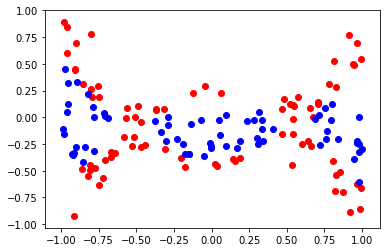

In [27]:
plt.scatter(xs[ys == 0, 0], xs[ys == 0, 1], color='red')
plt.scatter(xs[ys == 1, 0], xs[ys == 1, 1], color='blue')

In [28]:
xs, ys = gen_hard(eps=0.25, f = lambda x, y: julia(x, y, c1 = -0.8, c2=0.156))
x = process(xs, ys)
np.savetxt('julia_2.txt', x)

(150,)


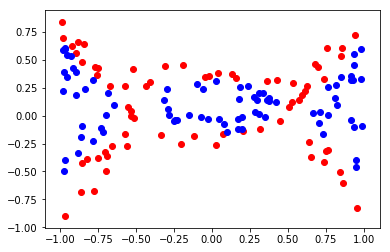

In [29]:
plt.scatter(xs[ys == 0, 0], xs[ys == 0, 1], color='red')
plt.scatter(xs[ys == 1, 0], xs[ys == 1, 1], color='blue')

In [30]:
xs, ys = gen_hard(eps=0.25, f = lambda x, y: julia(x, y, c1 =0, c2=-0.8))
x = process(xs, ys)
np.savetxt('julia_3.txt', x)

(150,)


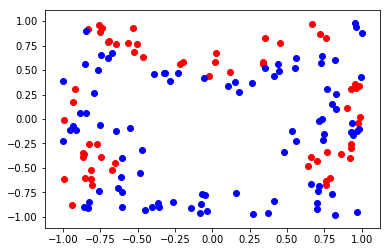

In [31]:
plt.scatter(xs[ys == 0, 0], xs[ys == 0, 1], color='red')
plt.scatter(xs[ys == 1, 0], xs[ys == 1, 1], color='blue')

In [32]:
import theano
import theano.tensor as T

In [46]:
class NN(object):
    def __init__(self):
        w1 = theano.shared(np.zeros(shape=(30, 100), dtype='float64'))
        b1 = theano.shared(np.zeros(shape=(100), dtype='float64'))
        
        w2 = theano.shared(np.zeros(shape=(100, 1), dtype='float64'))
        b2 = theano.shared(np.zeros(shape=1, dtype='float64'))
        
        X = T.dmatrix()
        h = T.nnet.sigmoid(T.dot(X, w1) + b1[None, :])
        y = T.flatten(T.dot(h, w2) + b2[None, :], outdim=1)
        
        self.predict = theano.function([X], y)
        
        self.w1 = w1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2
    
    def set(self):
        self.w1.set_value(np.random.uniform(-1, 1, size=(150, 100)))
        self.w2.set_value(np.random.uniform(-1, 1, size=(100, 1)))
        
        self.b1.set_value(np.random.uniform(-1, 1, size=100))
        self.b2.set_value(np.random.uniform(-1, 1, size=1))

In [47]:
nn = NN()

In [48]:
nn.set()

In [49]:
for i in range(10):
    xs = np.random.uniform(-1, 1, size=(150, 30))
    ys = threshold(nn.predict(xs))
    
    x = process(xs, ys)
    np.savetxt('random_%d.txt' % i, x)

ValueError: Shape mismatch: x has 30 cols (and 150 rows) but y has 150 rows (and 100 cols)
Apply node that caused the error: Dot22(<TensorType(float64, matrix)>, <TensorType(float64, matrix)>)
Toposort index: 2
Inputs types: [TensorType(float64, matrix), TensorType(float64, matrix)]
Inputs shapes: [(150, 30), (150, 100)]
Inputs strides: [(240, 8), (800, 8)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{Composite{scalar_sigmoid((i0 + i1))}}[(0, 0)](Dot22.0, InplaceDimShuffle{x,0}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.